In [2]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse
import statsmodels.api as sm # module for OLS
from functools import reduce
from datetime import datetime

import pandas_datareader.data as web  # module for reading datasets directly from the web
import pandas_datareader.famafrench as ff 

In [3]:
# Read anomalies and merge into a single dataframe

anom_list = ['momentum',
             'value_growth',
             'investment',
             'profitability',
             'intangibles',
             'frictions']

df_list=[] # empty list
for item in anom_list:
  filename = '/Users/namwoo/Desktop/UNIST/lecture/1-1/인공지능을 활용한 금융시장 분석/Section_3/' + item + '.csv'
  df = pd.read_csv(filename)
  df_list.append(df.drop(columns=['Unnamed: 0'])) # each element of df_list represents each group

anomaly = reduce(lambda  x,y: pd.merge(x,y,on=['date'],how='inner'), df_list) # merge all anomalies in one dataset
anomaly['date'] = pd.to_datetime(anomaly['date']).dt.to_period(freq='m') # date in period format
print(anomaly.info())
anomaly.to_csv('/Users/namwoo/Desktop/UNIST/lecture/1-1/인공지능을 활용한 금융시장 분석/Section_3/anomalies188.csv', sep=',', na_rep='NaN')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 659
Columns: 189 entries, date to tv_1
dtypes: float64(188), period[M](1)
memory usage: 979.7 KB
None


In [8]:
anomaly.head(10)

,date,abr_1,abr_6,abr_12,cim_1,cim_6,cim_12,cm_1,cm_12,def_1,...,beta_1,dtv_12,isff_1,isq_1,ivff_1,ivq_1,me,srev,sv_1,tv_1
0,1967-01,NaN,NaN,NaN,-5.9658,-5.9658,-5.9658,NaN,NaN,NaN,...,11.8004,-4.4299,3.5865,NaN,12.1847,NaN,-13.0562,-0.1126,NaN,11.4709
1,1967-02,NaN,NaN,NaN,7.3177,6.9734,6.9734,NaN,NaN,NaN,...,2.1382,-2.7018,-1.2576,-1.2026,4.7215,2.9410,-5.1638,2.8017,NaN,4.7486
2,1967-03,NaN,NaN,NaN,0.7130,0.7598,0.7598,NaN,NaN,NaN,...,0.2358,-1.6275,4.8673,1.3089,0.6764,1.4314,-3.3238,-1.5156,NaN,0.3803
3,1967-04,NaN,NaN,NaN,0.0488,-1.1019,-1.1019,NaN,NaN,NaN,...,3.0167,0.5737,-3.6645,-4.5651,-3.0035,-0.9637,-0.7099,-1.9171,NaN,-0.8516
4,1967-05,NaN,NaN,NaN,-3.3818,-0.8520,-0.8520,NaN,NaN,NaN,...,1.3046,-6.4407,-1.2705,-2.1974,3.4395,2.9436,-4.8868,-4.0637,NaN,0.6068
5,1967-06,NaN,NaN,NaN,2.6864,1.8143,1.8143,NaN,NaN,NaN,...,5.3642,-4.3680,1.7429,4.0349,9.0798,10.4309,-12.6906,2.1118,NaN,9.4936
6,1967-07,NaN,NaN,NaN,-3.0291,-1.4756,-1.9696,NaN,NaN,NaN,...,4.4379,-4.0069,-2.3318,-0.3176,2.9932,2.9058,-6.0201,-0.6798,NaN,3.6495
7,1967-08,NaN,NaN,NaN,-0.1846,0.2394,0.2450,NaN,NaN,NaN,...,-0.7564,-2.2595,-2.0849,-1.7874,-0.5183,-0.6487,-1.8852,0.3253,NaN,-1.0696
8,1967-09,NaN,NaN,NaN,4.7868,-0.3979,0.2695,NaN,NaN,NaN,...,3.1530,-2.5475,-0.9828,-1.8780,1.7034,1.7204,-5.5821,1.5122,NaN,1.8708
9,1967-10,NaN,NaN,NaN,6.5049,0.0131,1.8338,NaN,NaN,NaN,...,-0.3413,-0.0612,6.8368,2.1904,2.7158,-0.4035,-0.5896,4.6168,NaN,1.2885


In [4]:
# fama-french 3 factor model (1993 paper)
ff_3factor = web.DataReader('F-F_Research_Data_Factors',
                            'famafrench',
                            start='1960-01-01',
                            end='2021-12-31') 

ff_3fac = ff_3factor[0] # monthly value-weighted returns

# Merge datasets: anomaly portfolios + Fama-French factors
anom_3fac = pd.merge(anomaly,ff_3fac, how = 'inner', left_on='date', right_index= True)

anom_3fac.rename(columns={'Mkt-RF':'MKT_RF'}, inplace=True)
print(anom_3fac.head())
print('{:.0f} anomalies in a dataset'.format(anom_3fac.columns.get_loc('tv_1')))

      date  abr_1  abr_6  abr_12   cim_1   cim_6  cim_12  cm_1  cm_12  def_1  \
0  1967-01    NaN    NaN     NaN -5.9658 -5.9658 -5.9658   NaN    NaN    NaN   
1  1967-02    NaN    NaN     NaN  7.3177  6.9734  6.9734   NaN    NaN    NaN   
2  1967-03    NaN    NaN     NaN  0.7130  0.7598  0.7598   NaN    NaN    NaN   
3  1967-04    NaN    NaN     NaN  0.0488 -1.1019 -1.1019   NaN    NaN    NaN   
4  1967-05    NaN    NaN     NaN -3.3818 -0.8520 -0.8520   NaN    NaN    NaN   

   ...   ivff_1   ivq_1       me    srev  sv_1     tv_1  MKT_RF   SMB   HML  \
0  ...  12.1847     NaN -13.0562 -0.1126   NaN  11.4709    8.15  8.32  2.27   
1  ...   4.7215  2.9410  -5.1638  2.8017   NaN   4.7486    0.78  3.35 -2.22   
2  ...   0.6764  1.4314  -3.3238 -1.5156   NaN   0.3803    3.99  1.55  0.37   
3  ...  -3.0035 -0.9637  -0.7099 -1.9171   NaN  -0.8516    3.89  0.63 -2.48   
4  ...   3.4395  2.9436  -4.8868 -4.0637   NaN   0.6068   -4.33  1.90  1.09   

     RF  
0  0.43  
1  0.36  
2  0.39  
3  0

In [5]:
# fama-french 5 factor model (2015 paper)
ff_5factor = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                            'famafrench',
                            start='1960-01-01', 
                            end='2021-12-31') 

ff_5fac = ff_5factor[0] # monthly value-weighted returns

# Merge datasets: anomaly portfolios + Fama-French factors
anom_5fac = pd.merge(anomaly, ff_5fac, how = 'inner', left_on='date', right_index= True)

anom_5fac.rename(columns={'Mkt-RF':'MKT_RF'}, inplace=True)
print(anom_5fac.head())
print('{:.0f} anomalies in a dataset'.format(anom_5fac.columns.get_loc('tv_1')))

      date  abr_1  abr_6  abr_12   cim_1   cim_6  cim_12  cm_1  cm_12  def_1  \
0  1967-01    NaN    NaN     NaN -5.9658 -5.9658 -5.9658   NaN    NaN    NaN   
1  1967-02    NaN    NaN     NaN  7.3177  6.9734  6.9734   NaN    NaN    NaN   
2  1967-03    NaN    NaN     NaN  0.7130  0.7598  0.7598   NaN    NaN    NaN   
3  1967-04    NaN    NaN     NaN  0.0488 -1.1019 -1.1019   NaN    NaN    NaN   
4  1967-05    NaN    NaN     NaN -3.3818 -0.8520 -0.8520   NaN    NaN    NaN   

   ...       me    srev  sv_1     tv_1  MKT_RF   SMB   HML   RMW   CMA    RF  
0  ... -13.0562 -0.1126   NaN  11.4709    8.15  9.10  2.27  0.96 -3.16  0.43  
1  ...  -5.1638  2.8017   NaN   4.7486    0.78  3.06 -2.22  1.99 -0.99  0.36  
2  ...  -3.3238 -1.5156   NaN   0.3803    3.99  1.87  0.37  0.86 -1.60  0.39  
3  ...  -0.7099 -1.9171   NaN  -0.8516    3.89  0.43 -2.48  2.33 -3.67  0.32  
4  ...  -4.8868 -4.0637   NaN   0.6068   -4.33  2.29  1.09 -1.73  1.73  0.33  

[5 rows x 195 columns]
188 anomalies in a da

In [6]:
nanom = 188
alpha = [0]*nanom
tval = [0]*nanom

for i in range(0,nanom):
  regeq = anom_5fac.columns[i+1] + ' ~ MKT_RF + SMB + HML + RMW + CMA'
  model = sm.formula.ols(formula = regeq, data = anom_5fac).fit()
  alpha[i] = abs(model.params[0])
  tval[i] = abs(model.tvalues[0])

print('Average absolute value of alpha is {:.2f}%'.format(np.mean(alpha)))
print('Average absolute value of t-statistics is {:.2f}'.format(np.mean(tval)))
print('Ratio of significant alpha is {:.2%}'.format(sum(map(lambda t : t > 2, tval))/nanom))

Average absolute value of alpha is 0.39%
Average absolute value of t-statistics is 2.71
Ratio of significant alpha is 60.11%


/var/folders/db/bpz0hmcx5zq0d724jv46hmq40000gn/T/ipykernel_34044/1107918873.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in y_tick])


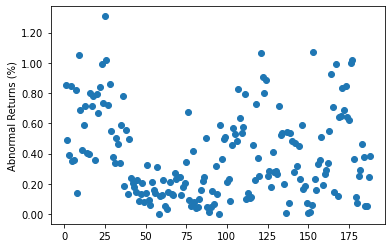

/var/folders/db/bpz0hmcx5zq0d724jv46hmq40000gn/T/ipykernel_34044/1107918873.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in y_tick])


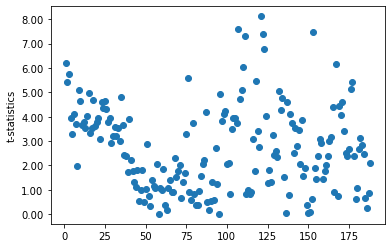

In [7]:
# Draw plot of alphas
x_axis = list(range(1,nanom+1))
x_axis
plt.plot(x_axis, alpha, 'o')
plt.ylabel('Abnormal Returns (%)')
y_tick = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in y_tick])
plt.show()

# Draw plot of t-statistics
x_axis = list(range(1,nanom+1))
x_axis
plt.plot(x_axis, tval, 'o')
plt.ylabel('t-statistics')
y_tick = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.2f}'.format(x) for x in y_tick])
plt.show()